# ODSC West 2022 Tutorial: 
### Objective: Gain intuition into the parameters that define a sinusoisal model
- Kirstin Aschbacher
- Sept 2022

In [14]:
from typing import List
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%config IPCompleter.greedy=True

In [15]:
# Noting versions used: numpy==1.19.2 & matplotlib==3.3.2
print(np.__version__)
print(matplotlib.__version__)

1.19.2
3.3.2


### The basic formula for a sine wave:
<SCRIPT SRC='https://cdn.mathjax.org/mathjax/latest/MathJax.js?config=TeX-AMS-MML_HTMLorMML'></SCRIPT>
<SCRIPT>MathJax.Hub.Config({ tex2jax: {inlineMath: [['$','$'], ['\\(','\\)']]}})</SCRIPT>$$ y(t)={A\sin(\omega t+\varphi )+yint}.$$
<p>Where:</p>
<ul>
    <li>A = Amplitude - peak deviation along the y-axis from 0</li>
    <li>ω = 2πf. Angular frequency - in units of radians per second</li>
    <li><span>&#632;</span> = Phase - specifies (in radians) where in the cycle the oscillation is when t = 0.</li>
    <li>yint = A non-zero center amplitude</li>
</ul>

### Define Helper Functions

In [3]:
def build_sine(
    time: np.ndarray, 
    amplitude: float, 
    omega: float, 
    phi: float=np.deg2rad(0),
    yint: float=0
) -> np.ndarray:
    """Helper function to build a sine wave, given a 1d numpy array representing time
    and the four sine wave parameter values"""
    return amplitude * np.sin((time * omega) + phi) + yint

def convert_Hz_to_bpm(freq: float) -> float:
    """Understand how to convert an ordinary frequency (units hertz) to breaths per minute"""
    breaths_per_min = freq * 60
    print(f"At an ordinary frequency of {freq} Hz, the HRV biofeedback pacer will ask you to breathe {breaths_per_min} times per minute.\n")
    return breaths_per_min

def convert_Hz_to_AF(freq: float) -> float:
    """Understand how to convert an ordinary frequency (units hertz) to an angular frequency"""
    omega = freq * 2 * np.pi
    print(f"A frequency in Hz (cycles per sec) of {freq} = Angular frequency of {omega:.3f}")
    return omega

### Create some synthetic data for plotting

In [4]:
time = np.linspace(0, 100, 1000)

# Set the ordinary frequency (in hertz) at which participants are asked to breathe
breathing_frequency = .1 

# Understand how to convert an ordinary frequency in the time domain to breaths per minute and angular frequency
convert_Hz_to_bpm(breathing_frequency)
omega = convert_Hz_to_AF(breathing_frequency)

series = build_sine(time, amplitude=1, omega=omega, phi=0, yint=0)

At an ordinary frequency of 0.1 Hz, the HRV biofeedback pacer will ask you to breathe 6.0 times per minute.

A frequency in Hz (cycles per sec) of 0.1 = Angular frequency of 0.628


### Plot a simple sine wave

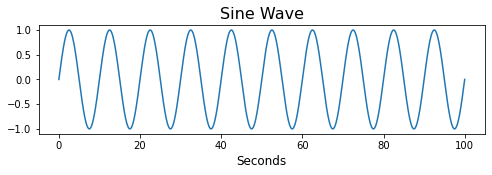

In [5]:
plt.figure(figsize=(8, 2))
plt.plot(time, series)
plt.title("Sine Wave", fontsize=16)
plt.xlabel("Seconds", fontsize=12)
plt.show()

### Define a plotting function that will plot several series together
* We will use this to understand how the sine wave plot changes when you vary each parameter

In [8]:
def plot_multiple_sinewaves(time: List[float], params: List[float], series: List[np.ndarray], 
    colors: List[str], linestyles: List[str], title: str
):
    # Create the figure and axis objects
    fig, ax = plt.subplots(1, 1, figsize=(16, 4))

    # Loop to plot 3 sine waves, each with a different amplitude
    n_plots = len(params)
    assert n_plots == len(colors) == len(linestyles)

    for i in range(n_plots):
        ax.plot(time, series[i], color=colors[i], ls=linestyles[i], label=np.round(params[i], 3))

    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Series Values", fontsize=12)
    plt.title(title, fontsize=16)
    plt.legend(loc=(1.01, .4))
    plt.show()

### First, let's see what happens if we change the amplitude.

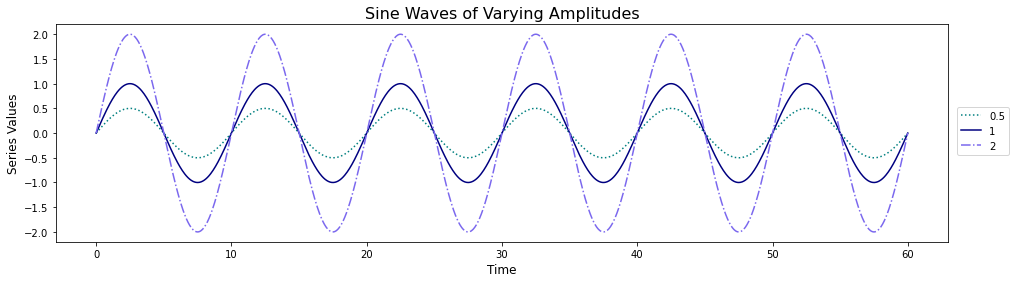

In [9]:
# Configure plot
amplitudes = [.5, 1, 2]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amp, omega, phi=0, yint=0) for amp in amplitudes]
fig_params = {
    "time": time,
    "params": amplitudes,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Amplitudes"
}
plot_multiple_sinewaves(**fig_params)

### Second, let's build some intuition into omega - the angular frequency
<img src="https://mriquestions.com/uploads/3/4/5/7/34572113/5036452_orig.gif" alt="Image of Angular Frequency"></img>

A frequency in Hz (cycles per sec) of 0.07 = Angular frequency of 0.440
A frequency in Hz (cycles per sec) of 0.1 = Angular frequency of 0.628
A frequency in Hz (cycles per sec) of 0.13 = Angular frequency of 0.817


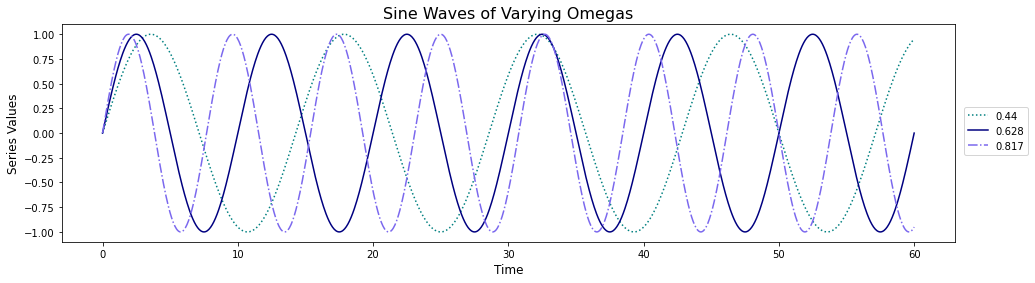

In [10]:
# Convert frequencies in the hertz to angular frequencies, and generate all sinefit data series
frequencies = [.07, .1, .13]
omegas = [convert_Hz_to_AF(freq) for freq in frequencies]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amplitude=1, omega=omg, phi=0, yint=0) for omg in omegas]

# Configure and plot
fig_params = {
    "time": time,
    "params": omegas,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Omegas"
}
plot_multiple_sinewaves(**fig_params)

### Understanding Phi - This parameter essentially shifts the waveform along the x-axis

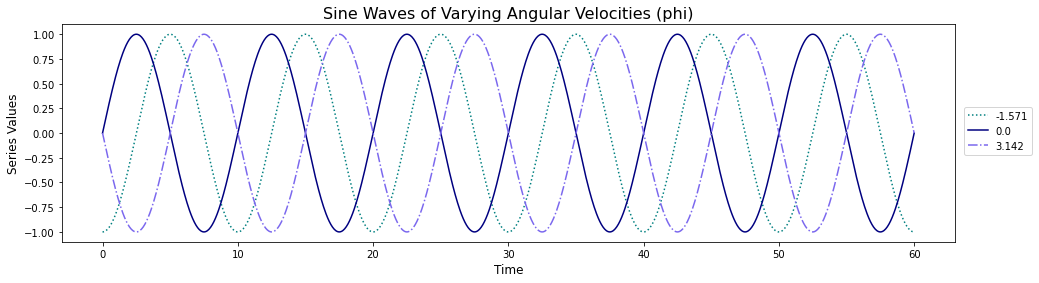

In [11]:
# Specify the offset in the x-axis in degrees ("phase")
phases = [-90, 0, 180]
# Now convert degrees to angular frequency.  phase -> phi.
phis = [np.deg2rad(phase) for phase in phases]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amplitude=1, omega=.1*2*np.pi, yint=0, phi=phi) for phi in phis]

# Configure & Plot
fig_params = {
    "time": time,
    "params": phis,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Angular Velocities (phi)"
}
plot_multiple_sinewaves(**fig_params)

### Finally, the y-intercept term reflects the shift along the y-axis
- When applying a sinefit model to HRV biofeedback data, you want the y-intercept to reflect the average heart rate

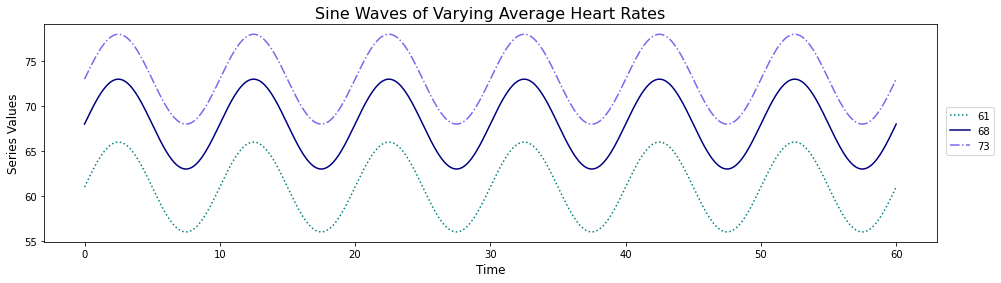

In [12]:
# Specify the offset in the x-axis in degrees ("phase")
heart_rates = [61, 68, 73]
time = np.linspace(0, 60, 1000)
series = [build_sine(time, amplitude=5, omega=.1*2*np.pi, yint=hr, phi=0) for hr in heart_rates]

# Configure & Plot
fig_params = {
    "time": time,
    "params": heart_rates,
    "series": series,
    "colors": ["teal", "navy", "mediumslateblue"],
    "linestyles": [":", "-", "-."],
    "title": "Sine Waves of Varying Average Heart Rates"
}
plot_multiple_sinewaves(**fig_params)

### Building a Complex Waveform from Multiple Sine Waves
* Here's what it looks like when several sine waves with different frequencies, amplitudes, etc are combined
* This begins to approximate better what a real continuous heart rate waveform looks like

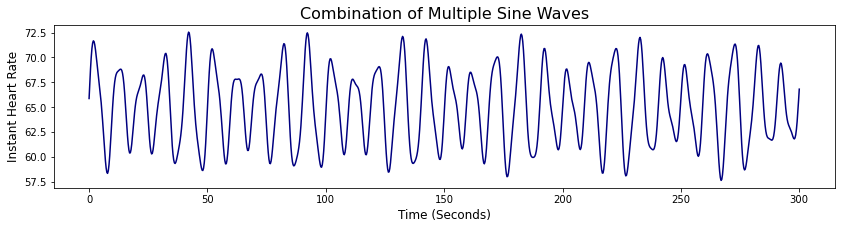

In [13]:
# Build three sinewaves, each with a different amplitude and frequency
time = np.linspace(0, 300, 1000)
sw1 = build_sine(time, amplitude=5, omega=.1*2*np.pi, yint=65, phi=np.deg2rad(10))
sw2 = build_sine(time, amplitude=1.6, omega=.078*2*np.pi, yint=0, phi=0)
sw3 = build_sine(time, amplitude=1, omega=.22*2*np.pi, yint=0, phi=0)

# Combine them with simple addition
series = sw1 + sw2 + sw3

# Plot the combined waveform
plt.figure(figsize=(14, 3))
plt.plot(time, series, color="navy")
plt.title("Combination of Multiple Sine Waves", fontsize=16)
plt.ylabel("Instant Heart Rate", fontsize=12)
plt.xlabel("Time (Seconds)", fontsize=12)
plt.show()

# Congratulations!  
### You've learned about the parameters of a sine wave!